In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
amazon_common_books_df = pd.read_pickle("/content/drive/My Drive/amazon_reviews/amazon_books_df_common.pkl")
goodreads_common_books_df = pd.read_pickle("/content/drive/My Drive/book_reviews/book_info_with_authors_df_common.pkl")

## **Number of books based on Authors**

In [ ]:
goodreads_per_author =  goodreads_common_books_df.groupby("goodreads_author_id").count()["goodreads_isbn"].reset_index().sort_values(by="goodreads_isbn", ascending=False)

In [ ]:
amazon_per_author = amazon_common_books_df.groupby("amazon_brand").count()["amazon_asin"].reset_index().sort_values(by="amazon_asin", ascending=False)

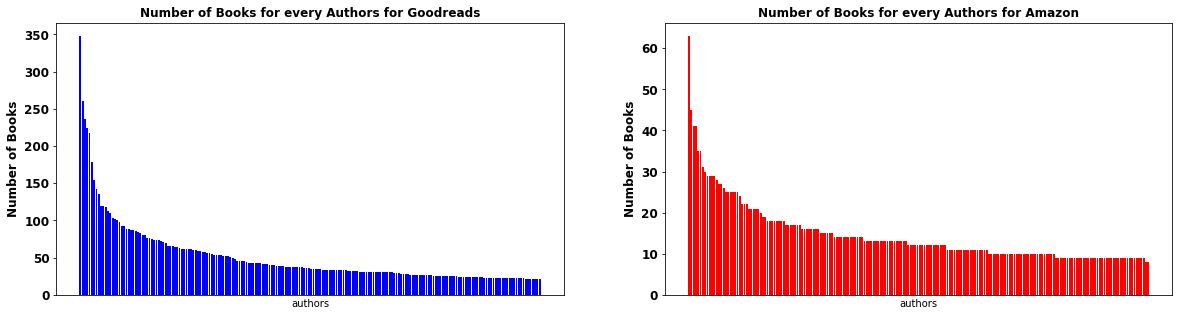

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.bar(goodreads_per_author.goodreads_author_id[:200], goodreads_per_author.goodreads_isbn[:200], color="blue")
plt.xticks([])
plt.ylabel("Number of Books", fontweight="bold", fontsize=12)
plt.title("Number of Books for every Authors for Goodreads", fontweight="bold", fontsize=12)
plt.xlabel("authors")
plt.yticks(fontweight="bold", fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(amazon_per_author.loc[amazon_per_author.amazon_brand!=""].amazon_brand[:200], amazon_per_author.loc[amazon_per_author.amazon_brand!=""].amazon_asin[:200], color="red")
plt.xticks([])
plt.ylabel("Number of Books", fontweight="bold", fontsize=12)
plt.title("Number of Books for every Authors for Amazon", fontweight="bold", fontsize=12)
plt.yticks(fontweight="bold", fontsize=12)
plt.xlabel("authors")
plt.show()

In [ ]:
amazon_per_author.loc[amazon_per_author.amazon_brand!=""]

,amazon_brand,amazon_asin
11776,Visit Amazon's Andre Norton Page,63
19506,Visit Amazon's Jane Yolen Page,45
25401,Visit Amazon's Michael Moorcock Page,41
30701,Visit Amazon's Terry Pratchett Page,41
22246,Visit Amazon's Kentaro Miura Page,35
...,...,...
10932,Visit Amazon's A. M. Albaugh Page,1
10931,Visit Amazon's A. Lynden Rolland Page,1
10930,Visit Amazon's A. Lopez Jr. Page,1
10927,Visit Amazon's A. L. Sowards Page,1


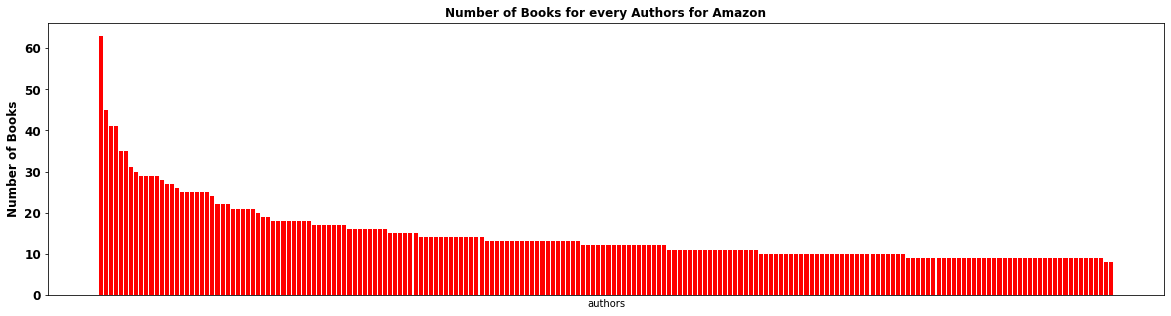

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(amazon_per_author.loc[amazon_per_author.amazon_brand!=""].amazon_brand[:200], amazon_per_author.loc[amazon_per_author.amazon_brand!=""].amazon_asin[:200], color="red")
plt.xticks([])
plt.ylabel("Number of Books", fontweight="bold", fontsize=12)
plt.title("Number of Books for every Authors for Amazon", fontweight="bold", fontsize=12)
plt.yticks(fontweight="bold", fontsize=12)
plt.xlabel("authors")
plt.show()

## **Number of reviews per book**

In [ ]:
book_info_df = pd.read_pickle("/content/drive/My Drive/book_reviews/book_info_with_authors_df_common.pkl")
book_reviews_df = pd.read_pickle("/content/drive/My Drive/book_reviews/goodreads_reviews_df_common.pkl")

amazon_book_df = pd.read_pickle("/content/drive/My Drive/amazon_reviews/amazon_books_df_common.pkl")
amazon_reviews_df = pd.read_pickle("/content/drive/My Drive/amazon_reviews/amazon_reviews_df_common.pkl")

In [ ]:
book_info_df.goodreads_title.shape

(45476,)

In [ ]:
book_df = pd.merge(book_info_df, book_reviews_df, left_on="goodreads_book_id", right_on="book_id", how="inner")

In [ ]:
num_reviews_per_book = book_reviews_df.groupby("book_id").count()[["review_id"]].reset_index().rename(columns={"review_id": "num_reviews"})

In [ ]:
num_reviews_per_book.columns

Index(['book_id', 'num_reviews'], dtype='object')

In [ ]:
num_reviews_per_book = num_reviews_per_book.sort_values(by="num_reviews", ascending=False)

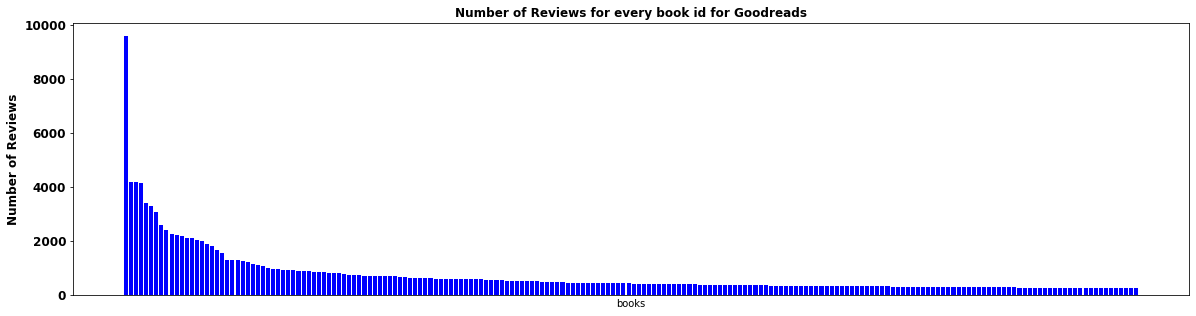

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(num_reviews_per_book.book_id[:200], num_reviews_per_book.num_reviews[:200], color="blue")
plt.xticks([])
plt.ylabel("Number of Reviews", fontweight="bold", fontsize=12)
plt.title("Number of Reviews for every book id for Goodreads", fontweight="bold", fontsize=12)
plt.yticks(fontweight="bold", fontsize=12)
plt.xlabel("books")
plt.show()

In [ ]:
amazon_df = pd.merge(amazon_book_df, amazon_reviews_df, how="inner", left_on="amazon_asin", right_on="asin")

In [ ]:
amazon_num_reviews_per_book = amazon_df.groupby("asin").count()[["reviewerID"]].reset_index().rename(columns={"reviewerID": "num_reviews"})
amazon_num_reviews_per_book = amazon_num_reviews_per_book.sort_values(by="num_reviews", ascending=False)

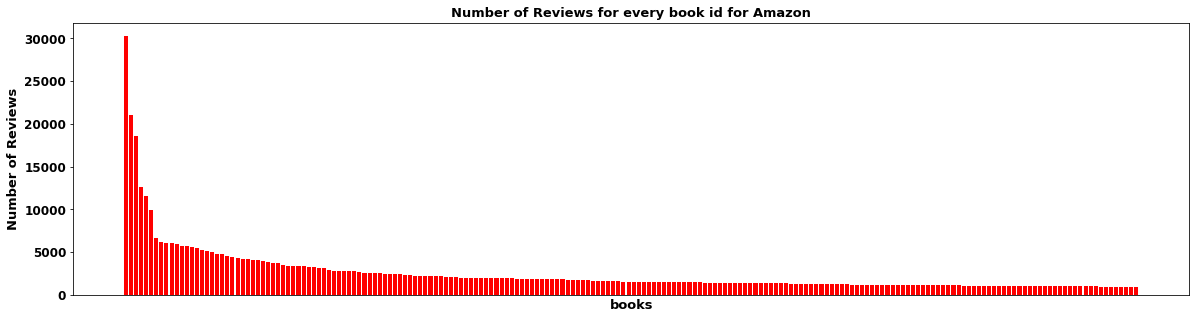

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(amazon_num_reviews_per_book.asin[:200], amazon_num_reviews_per_book.num_reviews[:200], color="red")
plt.xticks([])
plt.ylabel("Number of Reviews", fontweight="bold", fontsize=13)
plt.title("Number of Reviews for every book id for Amazon", fontweight="bold", fontsize=13)
plt.xlabel("books", fontweight="bold", fontsize=13)
plt.yticks(fontweight="bold", fontsize=12)
plt.show()